In [1]:
import numpy as np
from numpy import random
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../../Datasets/MNIST_Digit/train.csv')

In [3]:
data = df.values
print(data.shape)

(42000, 785)


In [4]:
data = data[:, 1:]
print(data.shape)

(42000, 784)


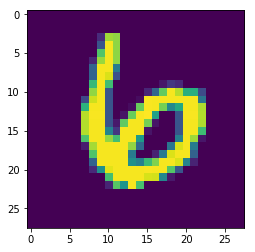

In [5]:
def print_sample():
    rand_num = random.randint(0,33000)
    img = np.reshape(data[rand_num], (28,28))
    plt.imshow(img)
    plt.show()
print_sample()

In [6]:
import tensorflow as tf

In [7]:
with tf.device('/gpu:0'):
    x = tf.placeholder(tf.float32, shape=[None, 28*28])

In [8]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape=shape, stddev=0.1)
    return tf.Variable(initial)

In [9]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [10]:
def fc_layer(prev, input_size, output_size):
    W = weight_variable([input_size, output_size])
    b = bias_variable([output_size])
    return tf.add(tf.matmul(prev, W), b)

In [11]:
l1 = tf.nn.tanh(fc_layer(x, 28*28, 512))
l1

<tf.Tensor 'Tanh:0' shape=(?, 512) dtype=float32>

In [12]:
l2 = tf.nn.tanh(fc_layer(l1, 512, 256))
l2

<tf.Tensor 'Tanh_1:0' shape=(?, 256) dtype=float32>

In [13]:
l3 = tf.nn.tanh(fc_layer(l2, 256, 128))
l3

<tf.Tensor 'Tanh_2:0' shape=(?, 128) dtype=float32>

In [14]:
l4 = tf.nn.tanh(fc_layer(l3, 128, 256))
l4

<tf.Tensor 'Tanh_3:0' shape=(?, 256) dtype=float32>

In [15]:
l5 = tf.nn.tanh(fc_layer(l4, 256, 512))
l5

<tf.Tensor 'Tanh_4:0' shape=(?, 512) dtype=float32>

In [16]:
out = fc_layer(l5, 512, 28*28)
out

<tf.Tensor 'Add_5:0' shape=(?, 784) dtype=float32>

In [17]:
loss = tf.reduce_mean(tf.squared_difference(x, out))
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [18]:
session = tf.Session()

In [19]:
session.run(tf.global_variables_initializer())

In [20]:
epochs = 200
batch_size = 100
iters_train = int(len(data)/batch_size)

In [21]:
## Traning
for j in range(epochs+1):
    for i in range(iters_train):
        frm = i*batch_size
        to = ((i*batch_size)+batch_size)
        X = data[frm:to]
        feed_dict = {x:X}
        session.run(optimizer, feed_dict=feed_dict)
    if j%(epochs/10) == 0 and j!=0:
        print(j, 'Epochs', 'completed')

20 Epochs completed
40 Epochs completed
60 Epochs completed
80 Epochs completed
100 Epochs completed
120 Epochs completed
140 Epochs completed
160 Epochs completed
180 Epochs completed
200 Epochs completed


In [28]:
def print_batch(batch, indx):
    for i in range(len(batch)):
        real_img_indx = indx[i]
        img = batch[i]
        real_img = test_data[real_img_indx]
        img = np.reshape(img, (28,28))
        real_img = np.reshape(real_img, (28, 28))
        plt.ylabel('Extracted Features')
        plt.imshow(img)
        plt.show()
        plt.ylabel('Real Image')
        plt.imshow(real_img)
        plt.show()

In [29]:
data_test = pd.read_csv('../../Datasets/MNIST_Digit/test.csv')
test_data = data_test.values
print(test_data.shape)

(28000, 784)


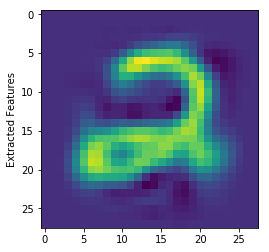

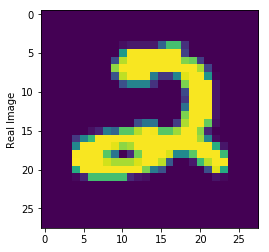

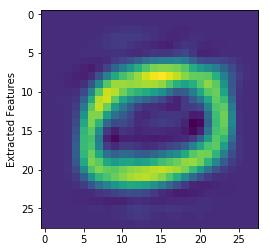

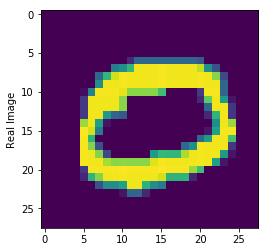

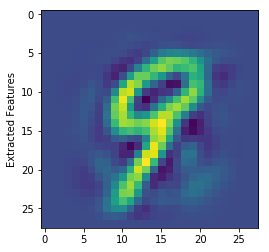

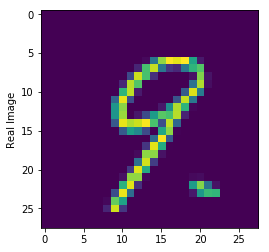

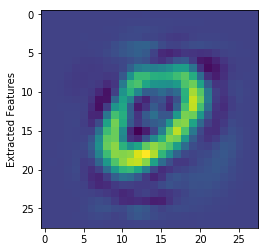

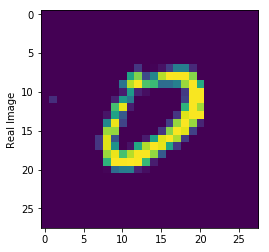

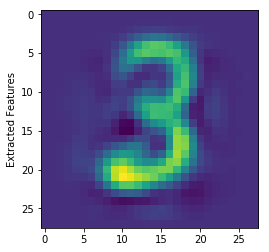

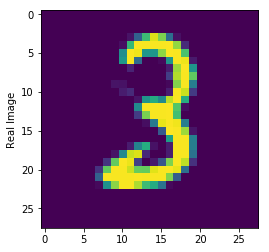

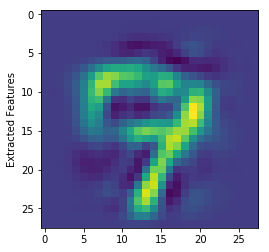

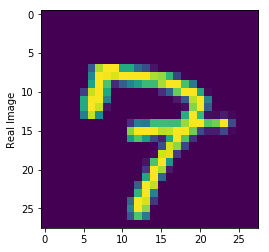

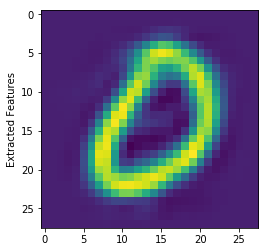

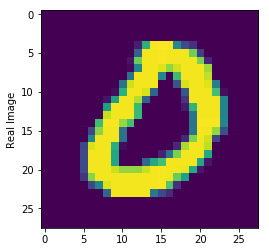

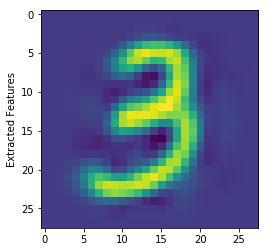

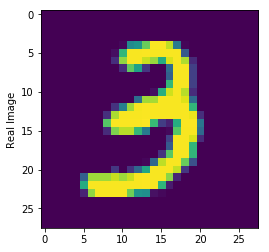

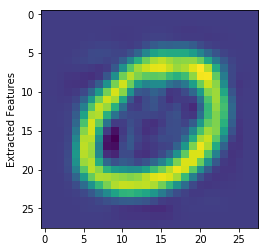

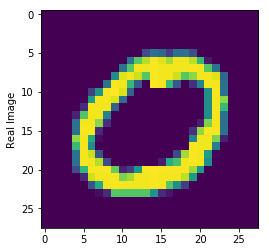

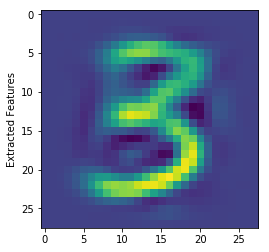

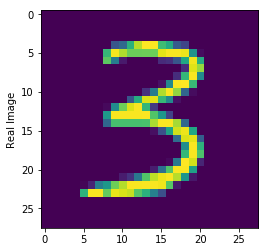

In [30]:
X = test_data[0:10]
output = session.run(out, feed_dict={x:X})
indx = [i for i in range(10)]
print_batch(output, indx)

In [25]:
session.close()